In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 20)

In [3]:
data = pd.read_csv('KAG_conversion_data.csv')

In [4]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.000000,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.270000,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.500000,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.160000,1,0


In [6]:
data.shape

(1143, 11)

In [7]:
data.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [8]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [9]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Checking for null values in the data

In [10]:
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

From above we can see that there are no null values present in the data

In [11]:
len(data.ad_id.unique())

1143

Every ad has it's own unique ad_id

In [12]:
data.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [13]:
data['xyz_campaign_id'] = data['xyz_campaign_id'].astype(str)
data['xyz_campaign_id'] = data.xyz_campaign_id.str.replace('1178','campaign_1178')
data['xyz_campaign_id'] = data.xyz_campaign_id.str.replace('936','campaign_936')
data['xyz_campaign_id'] = data.xyz_campaign_id.str.replace('916','campaign_916')

In [14]:
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,campaign_916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,campaign_916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,campaign_916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,campaign_916,103928,30-34,M,28,4133,1,1.290000,1,1
5,708820,campaign_916,103929,30-34,M,29,1915,0,0.000000,1,1
6,708889,campaign_916,103940,30-34,M,15,15615,3,4.770000,1,0
7,708895,campaign_916,103941,30-34,M,16,10951,1,1.270000,1,1
8,708953,campaign_916,103951,30-34,M,27,2355,1,1.500000,1,0
9,708958,campaign_916,103952,30-34,M,28,9502,3,3.160000,1,0


In [15]:
data.xyz_campaign_id.value_counts()

campaign_1178    625
campaign_936     464
campaign_916      54
Name: xyz_campaign_id, dtype: int64

Text(0, 0.5, 'count')

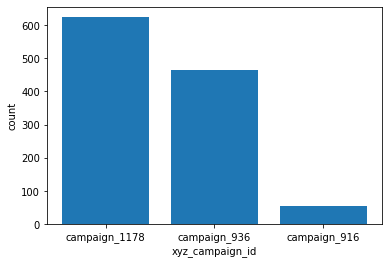

In [16]:
plt.bar(data.xyz_campaign_id.value_counts().index,data.xyz_campaign_id.value_counts().values)
plt.xlabel('xyz_campaign_id')
plt.ylabel('count')

From above we can see campaign_1178 have more ads.

In [17]:
data.fb_campaign_id.value_counts()

144562    6
144636    6
144611    6
144536    6
144674    6
144599    6
144572    5
144697    5
144554    5
144586    5
144602    5
144724    5
144549    5
144597    5
144580    5
144691    5
144565    5
144624    5
144592    5
144664    5
144635    5
144627    5
144649    5
144622    5
144634    5
144531    5
144532    5
144651    5
144667    5
144537    5
144585    5
110982    4
111006    4
144722    4
144666    4
144567    4
144579    4
144535    4
144735    4
144538    4
144533    4
144660    4
144742    4
144534    4
115547    4
115541    4
144575    4
144626    4
115510    4
144736    4
144552    4
144556    4
144569    4
144571    4
144639    4
144594    4
144604    4
144659    4
144653    4
144661    4
144725    4
144547    4
144656    4
144570    4
144669    4
144679    4
144699    4
144672    4
144595    3
144726    3
144574    3
123736    3
144601    3
144539    3
115545    3
144686    3
144733    3
123457    3
144589    3
144652    3
144670    3
144732    3
115485    3
1154

In [18]:
data.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

Text(0, 0.5, 'count')

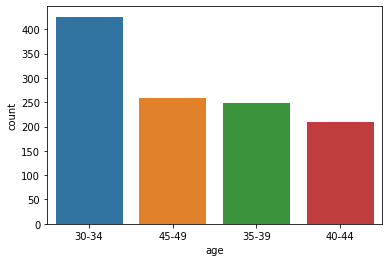

In [19]:
sns.barplot(x = data.age.value_counts().index,y = data.age.value_counts().values)
plt.xlabel('age')
plt.ylabel('count')

30-34 age group is majority count in this data.

In [20]:
data.gender.value_counts()

M    592
F    551
Name: gender, dtype: int64

Text(0, 0.5, 'count')

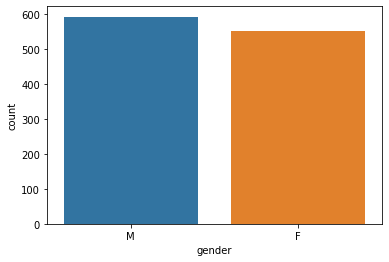

In [21]:
sns.barplot(x = data.gender.value_counts().index,y = data.gender.value_counts().values)
plt.xlabel('gender')
plt.ylabel('count')

Both the genders have almost equal count.

In [22]:
data.interest.value_counts()

16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
22      33
32      33
19      32
25      26
31      25
2       25
30      25
7       24
24      24
23      23
36      21
65      19
66      11
107      8
110      8
101      7
102      7
112      7
105      7
108      7
111      6
100      6
113      6
109      6
106      5
104      5
103      5
114      5
Name: interest, dtype: int64

Spent                Clicks                 0.992906
Clicks               Spent                  0.992906
Impressions          Spent                  0.970386
Spent                Impressions            0.970386
Clicks               Impressions            0.948514
Impressions          Clicks                 0.948514
Approved_Conversion  Total_Conversion       0.864034
Total_Conversion     Approved_Conversion    0.864034
                     Impressions            0.812838
Impressions          Total_Conversion       0.812838
Spent                Total_Conversion       0.725379
Total_Conversion     Spent                  0.725379
                     Clicks                 0.694632
Clicks               Total_Conversion       0.694632
Impressions          Approved_Conversion    0.684249
Approved_Conversion  Impressions            0.684249
Spent                Approved_Conversion    0.593178
Approved_Conversion  Spent                  0.593178
Clicks               Approved_Conversion    0.

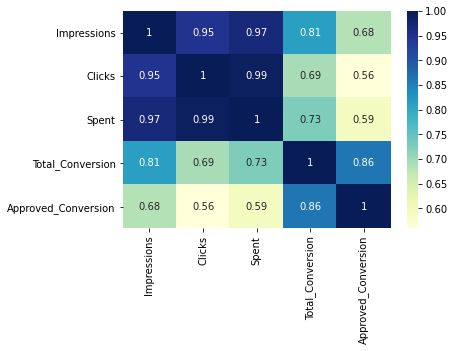

In [23]:
corr = data[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr().abs()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True , annot_kws={'size': 10})
s = corr.unstack()
so = s.sort_values(kind="quicksort")
print(so[::-1][5:])

In [24]:
campaign_1178_data = data[data['xyz_campaign_id'] == 'campaign_1178']
campaign_936_data = data[data['xyz_campaign_id'] == 'campaign_936']
campaign_916_data = data[data['xyz_campaign_id'] == 'campaign_916']

In [25]:
campaign_1178_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
518,1121091,campaign_1178,144531,30-34,M,10,1194718,141,254.049996,28,14
519,1121092,campaign_1178,144531,30-34,M,10,637648,67,122.400000,13,5
520,1121094,campaign_1178,144531,30-34,M,10,24362,0,0.000000,1,1
521,1121095,campaign_1178,144531,30-34,M,10,459690,50,86.330001,5,2
522,1121096,campaign_1178,144531,30-34,M,10,750060,86,161.909999,11,2


In [26]:
campaign_936_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
54,734209,campaign_936,108654,30-34,M,10,1772,0,0.00,1,1
55,734210,campaign_936,108654,30-34,M,10,13329,4,5.63,1,1
56,734215,campaign_936,108655,30-34,M,15,13659,3,3.84,1,0
57,734243,campaign_936,108660,30-34,M,21,739,0,0.00,1,1
58,734266,campaign_936,108664,30-34,M,25,605,0,0.00,1,0


In [27]:
((campaign_1178_data['Spent']/campaign_1178_data['Approved_Conversion']).replace({np.inf :0, np.NaN : 0}).sum())/625

36.25936434343505

In [28]:
((campaign_936_data['Spent']/campaign_936_data['Approved_Conversion']).replace({np.inf :0, np.NaN : 0}).sum())/464

2.037377871184267

In [29]:
((campaign_916_data['Spent']/campaign_916_data['Approved_Conversion']).replace({np.inf :0, np.NaN : 0}).sum())/54

1.3962962979629632

In [30]:
((campaign_1178_data['Spent']/campaign_1178_data['Approved_Conversion']).replace({np.inf :0, np.NaN : 0}).sum())/385

58.86260445362833

In [31]:
(campaign_1178_data['Spent']/campaign_1178_data['Approved_Conversion']).replace({np.inf :0, np.NaN : 0})

518      18.146428
519      24.480000
520       0.000000
521      43.165001
522      80.955000
523       0.000000
524      23.677000
525      37.644118
526       1.590000
527      17.656667
528      17.150000
529       8.260000
530       0.000000
531      11.707143
532     105.180000
533      35.730000
534      53.960000
535       0.000000
536       0.000000
537      39.332499
538      26.569999
539      31.030000
540      78.920000
541       0.000000
542      36.530000
543      28.850000
544      28.634444
545       0.000000
546       7.900000
547      62.060000
548       2.100000
549       7.070000
550      11.865000
551       0.000000
552       0.000000
553       0.000000
554      33.825000
555       0.000000
556       0.000000
557      26.130000
558      13.040000
559      38.390000
560      69.385000
561      37.197143
562       0.000000
563       0.000000
564       0.000000
565       0.000000
566       0.000000
567       5.140000
568      54.140000
569       0.000000
570       0.

In [32]:
(campaign_936_data['Spent']/campaign_936_data['Approved_Conversion']).replace({np.inf :0, np.NaN : 0})

54       0.000000
55       5.630000
56       0.000000
57       0.000000
58       0.000000
59       0.000000
60       0.000000
61       0.000000
62       0.000000
63       1.460000
64       2.840000
65       1.350000
66       0.000000
67       0.000000
68       0.000000
69       0.000000
70       0.000000
71       0.000000
72       0.000000
73       0.000000
74       0.000000
75       0.000000
76       0.000000
77       1.530000
78       0.000000
79      10.030000
80       0.000000
81       0.000000
82       0.000000
83       6.763333
84       1.390000
85       0.000000
86       1.570000
87       0.000000
88       1.290000
89       1.410000
90      16.665000
91       3.340000
92       0.000000
93       5.210000
94       0.000000
95       0.000000
96       0.000000
97       0.000000
98       0.000000
99       0.000000
100      0.000000
101      0.000000
102      0.000000
103      0.000000
104      0.000000
105      0.000000
106      0.000000
107      0.000000
108      0.000000
109      9

In [33]:
((campaign_936_data['Spent']/campaign_936_data['Approved_Conversion']).replace({np.inf :0, np.NaN : 0}).sum())/112

8.44056546633482

In [34]:
(campaign_1178_data['Spent'].sum()/campaign_1178_data['Approved_Conversion'].sum())

63.83274077822706

In [35]:
(campaign_936_data['Spent'].sum()/campaign_936_data['Approved_Conversion'].sum())

15.81076502149727

In [36]:
(campaign_916_data['Spent'].sum()/campaign_916_data['Approved_Conversion'].sum())

6.237916694041665

In [37]:
print(campaign_1178_data['Approved_Conversion'].sum())
print(campaign_936_data['Approved_Conversion'].sum())
print(campaign_916_data['Approved_Conversion'].sum())

872
183
24


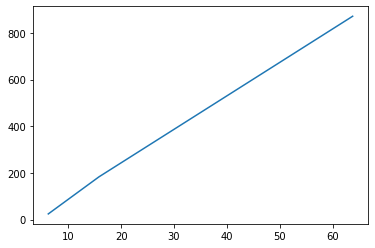

In [38]:
plt.plot((63.8,15.81,6.23),(872,183,24))

In [39]:
(campaign_1178_data['Spent'].sum()/campaign_1178_data['Clicks'].sum())

1.543255793462737

In [40]:
((campaign_1178_data['Spent']/campaign_1178_data['Clicks']).replace({np.inf :0, np.NaN : 0}).sum())/625

1.5423018944293503

In [41]:
(campaign_936_data['Spent'].sum()/campaign_936_data['Clicks'].sum())

1.4583518139788307

In [42]:
((campaign_936_data['Spent']/campaign_936_data['Clicks']).replace({np.inf :0, np.NaN : 0}).sum())/464

0.8467419998162078

In [43]:
(campaign_916_data['Spent'].sum()/campaign_916_data['Clicks'].sum())

1.3248672624513271

In [44]:
print(campaign_1178_data['Clicks'].sum())
print(campaign_936_data['Clicks'].sum())
print(campaign_916_data['Clicks'].sum())

36068
1984
113


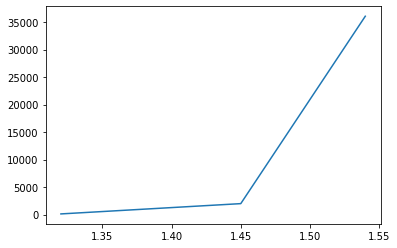

In [45]:
plt.plot((1.54,1.45,1.32),(36068,1984,113))

In [46]:
campaign_1178_data['CPI'] = campaign_1178_data['Clicks']/campaign_1178_data['Impressions']
campaign_936_data['CPI'] = campaign_936_data['Clicks']/campaign_936_data['Impressions']
campaign_916_data['CPI'] = campaign_916_data['Clicks']/campaign_916_data['Impressions']
campaign_1178_data['SPC'] = campaign_1178_data['Spent']/campaign_1178_data['Clicks']
campaign_936_data['SPC'] = campaign_936_data['Spent']/campaign_936_data['Clicks']
campaign_916_data['SPC'] = campaign_916_data['Spent']/campaign_916_data['Clicks']
campaign_1178_data['SPA'] = campaign_1178_data['Spent']/campaign_1178_data['Approved_Conversion']
campaign_936_data['SPA'] = campaign_936_data['Spent']/campaign_936_data['Approved_Conversion']
campaign_916_data['SPA'] = campaign_916_data['Spent']/campaign_916_data['Approved_Conversion']
campaign_1178_data['APT'] = campaign_1178_data['Approved_Conversion']/campaign_1178_data['Total_Conversion']
campaign_936_data['APT'] = campaign_936_data['Approved_Conversion']/campaign_936_data['Total_Conversion']
campaign_916_data['APT'] = campaign_916_data['Approved_Conversion']/campaign_916_data['Total_Conversion']
campaign_1178_data['TPC'] = campaign_1178_data['Total_Conversion']/campaign_1178_data['Clicks']
campaign_936_data['TPC'] = campaign_936_data['Total_Conversion']/campaign_936_data['Clicks']
campaign_916_data['TPC'] = campaign_916_data['Total_Conversion']/campaign_916_data['Clicks']
campaign_1178_data['APC'] = campaign_1178_data['Approved_Conversion']/campaign_1178_data['Clicks']
campaign_936_data['APC'] = campaign_936_data['Approved_Conversion']/campaign_936_data['Clicks']
campaign_916_data['APC'] = campaign_916_data['Approved_Conversion']/campaign_916_data['Clicks']

<ipython-input-46-1fee531ac1d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_1178_data['CPI'] = campaign_1178_data['Clicks']/campaign_1178_data['Impressions']
<ipython-input-46-1fee531ac1d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_936_data['CPI'] = campaign_936_data['Clicks']/campaign_936_data['Impressions']
<ipython-input-46-1fee531ac1d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

CPI = clicks per impressions ; 
SPC = spent per click ; 
SPA = spent per approved_conversion ; 
APT = approved_conversions per total_conversions ; 
TPC = total_conversions per clicks ; 
APC = approved_conversions per clicks 

In [49]:
campaign_1178_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPI,SPC,SPA,APT,TPC,APC
518,1121091,campaign_1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.000118,1.801773,18.146428,0.500000,0.198582,0.099291
519,1121092,campaign_1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.000105,1.826866,24.480000,0.384615,0.194030,0.074627
520,1121094,campaign_1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,0.000000,1.000000,inf,inf
521,1121095,campaign_1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.000109,1.726600,43.165001,0.400000,0.100000,0.040000
522,1121096,campaign_1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.000115,1.882674,80.955000,0.181818,0.127907,0.023256


In [62]:
cpi_1178 = (campaign_1178_data.CPI.sum())/(campaign_1178_data.shape[0])
cpi_936 = (campaign_936_data.CPI.sum())/(campaign_936_data.shape[0])
cpi_916 = (campaign_916_data.CPI.sum())/(campaign_916_data.shape[0])

In [64]:
info = {'campaign_1178':str(cpi_1178)+'%' , 'campaign_936':str(cpi_936)+'%' , 'campaign_916':str(cpi_916)+'%'}
cpi_info = pd.DataFrame(info,index=['CPI(%)'])

In [65]:
cpi_info

,campaign_1178,campaign_936,campaign_916
CPI(%),0.0001622110890917426%,0.00016501501497368393%,0.00018014713698909525%


In [71]:
(campaign_916_data.CPI.sum())/(campaign_916_data.shape[0])

0.00018014713698909525

In [81]:
(campaign_1178_data.APT.sum())/(campaign_1178_data.shape[0])

0.32411583347966927

In [80]:
campaign_1178_data['Approved_Conversion'].sum() / campaign_1178_data['Total_Conversion'].sum()

0.3267141251405021